# Data Science Job Salaries

In [56]:
!pip install country_converter
! pip install pywaffle
! pip install squarify

In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcl
import matplotlib.patches as mpt
import warnings
warnings.filterwarnings('ignore')
import squarify
import matplotlib.lines as mlines

pd.set_option('max_row', 10)
# import plotly.express as px
# import country_converter as coco
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# from pywaffle import Waffle

facecolor='#262626'

### Load Data

In [58]:
df = pd.read_csv('ds_salaries.csv')

In [59]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### EDA and Feature Engineering

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


If we check the information above, we can see that it is divided as follows.
Numerical variables: work_year, salary, salary_in_usd, remote_ratio
Object variables: experience_level, employment_type, salary_currency, job_title, employee_residence, company_location, company_size
Some numeric variables can be nominal or ordinal, so you should check the stored values.

In [61]:
from IPython.core.display import HTML
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [62]:
multi_table([pd.DataFrame(df[col].value_counts()) for col in df.columns])

,Unnamed: 0
606,1
207,1
205,1
204,1
203,1
...,...
403,1
402,1
401,1
400,1


**insight** Work_year and remote_ratio are numeric variables, but they are divided into three types and have order or rank. company_size is an object-type variable, which also ranks.
experience_level, employment_type, job_title, and employee_residence are all nominal variables.
Other variables are numerical variables and have continuity.

In [63]:
col_ordinal = ['work_year', 'remote_ratio', 'company_size']
col_nominal = df.columns[df.columns.map(lambda x: x not in col_ordinal and df_origin[x].dtype == 'object')].values
col_continuous = ['salary', 'salary_in_usd']

In [64]:
print(f'ordinal vars: {col_ordinal}')
print(f'nominal vars: {col_nominal}')
print(f'continuous vars: {col_continuous}')

ordinal vars: ['work_year', 'remote_ratio', 'company_size']
nominal vars: ['experience_level' 'employment_type' 'job_title' 'salary_currency'
 'employee_residence' 'company_location']
continuous vars: ['salary', 'salary_in_usd']


### Preprocessing

We do some pre-processing in Section 3.2. The preprocessing tasks are as follows:

1. Check missing values
2. Create Derivative Variables

In [65]:
print(f'missing count: {df.isnull().sum().sum()}')

missing count: 0


No missing values`

In [66]:
num_job = df.job_title.nunique()
num_occupation = df.job_title.map(lambda x: x.split(' ')[-1]).nunique()

print(f'the number of job: {num_job}')
print(f"the number of occupations: {num_occupation}")

the number of job: 50
the number of occupations: 14


Currently, jobs are divided in great detail. It may not be very meaningful to analyze in this way. Because some jobs have only one job. You can find common ground by checking the names of each job. For example, if you separate them into the last words of the title, you can see that they are grouped into 14 occupational groups.
In addition, I've put together a few words that have the same meaning ('Lead', 'Head', 'Director') and a very small number of high earners ('Specialist') into one professional group.

In [67]:
df['occupation'] = df['job_title'].map(lambda x: x.split(' ')[-1])
df.loc[df_origin['job_title'].map(lambda x: 'Lead' in x), 'occupation'] = 'Leader'
df.loc[df_origin['job_title'].map(lambda x: 'Head' in x), 'occupation'] = 'Leader'
df.loc[df_origin['job_title'].map(lambda x: 'Specialist' in x), 'occupation'] = 'Leader'
df.loc[df_origin['job_title'].map(lambda x: 'Director' in x), 'occupation'] = 'Leader'

In [68]:
df['occupation'].value_counts()

Engineer      216
Scientist     191
Analyst       116
Leader         34
Manager        25
Architect      12
Consultant      7
Developer       5
Researcher      1
Name: occupation, dtype: int64

For visibility of experience_level and employment_type, we modified it to full name.

In [69]:
df.loc[df['experience_level']=='EN', 'experience_level'] = 'Junior'
df.loc[df['experience_level']=='MI', 'experience_level'] = 'Mid'
df.loc[df['experience_level']=='SE', 'experience_level'] = 'Senior'
df.loc[df['experience_level']=='EX', 'experience_level'] = 'Expert'

df.loc[df['employment_type']=='PT', 'employment_type'] = 'Part'
df.loc[df['employment_type']=='FT', 'employment_type'] = 'Full'
df.loc[df['employment_type']=='CT', 'employment_type'] = 'Contract'
df.loc[df['employment_type']=='FL', 'employment_type'] = 'Freelance'

In [70]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,occupation
0,0,2020,Mid,Full,Data Scientist,70000,EUR,79833,DE,0,DE,L,Scientist
1,1,2020,Senior,Full,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Scientist
2,2,2020,Senior,Full,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Engineer
3,3,2020,Mid,Full,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Analyst
4,4,2020,Senior,Full,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Engineer


### Univariate / Bivariate Explore
We understand the nature of each variable by exploring each individual variable. It also looks at the appropriate visualization methods based on the variables.

#### Experience Level
What is the percentage of career experience for each worker in the given data? This is a nominal variable, so you can see the distribution in the pie chart.

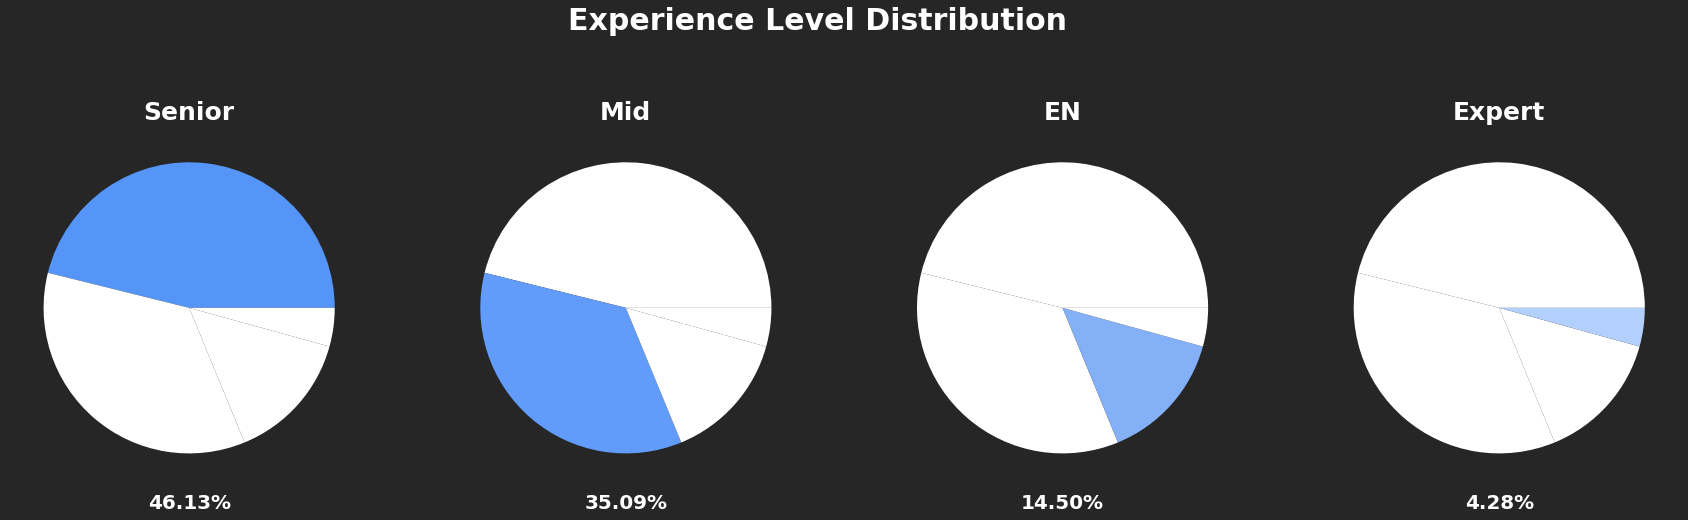

In [74]:
# Data 
colors_blue = ['#5495f7', '#619cfa', '#83b0f7', '#b3d0fc']
df_fig = df_origin['experience_level'].value_counts()
df_fig_size = len(df_fig)

# Setting 01
f, ax =plt.subplots(1, 4, figsize=(30, 7))
f.set_facecolor(facecolor)

# Draw 
for i in range(df_fig_size):
    colors_temp = ['white'] * df_fig_size
    colors_temp[i] = colors_blue[i]
    ax[i].pie(df_fig, colors=colors_temp)
    ax[i].set_title(df_fig.index[i], fontweight='bold', size=25, color='white')
    ax[i].set_xlabel(f'{df_fig[i] / df_origin.shape[0] * 100:.2f}%',
                    fontweight='bold', size=20, color='white')

    
# Setting 02 
f.suptitle('Experience Level Distribution', size=30, color='white', fontweight='bold',y=1.1)

plt.show()

**Experience Levle** As a result of the analysis, Senior accounted for the largest percentage at 46.13%, while Expert accounted for the smallest percentage at 4.28%.